# Arboles de decision

Este tipo de modelo es de los mas facilmente interpretables, y se basa en la descomposicion de nuestros datos mediante la toma de decisiones basada en la formulacion de una serie de preguntas:

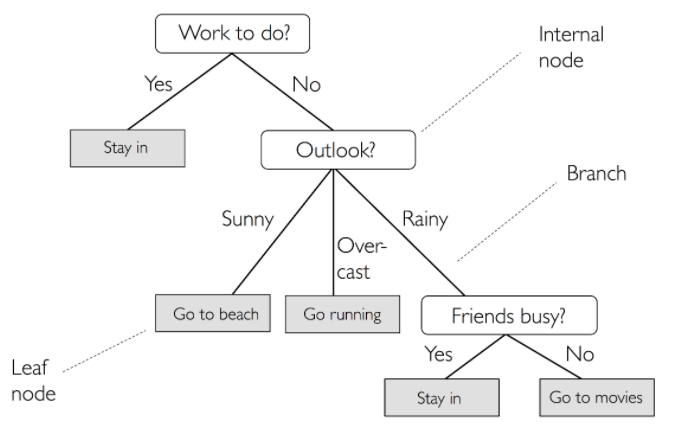

En el anterior ejemplo se manejaron variables categoricas, pero tambien se puede extender la misma idea para variables cuantitativas a partir del uso de operadores de comparacion.

El funcionamiento del algoritmo se basa en la toma de decisiones que maximicen la **ganancia de informacion** (**IG**). Se inicia en la raiz del arbol, y se dividen los datos buscando dicha ganacia. Se repite el mismo proceso en cada nodo hijo hasta que las hojas sean **puras**, lo que significa que las muestras de cada nodo pertencen a una unica clase. En la practica esto puede llevar a arboles muy profundos con muchos nodos, lo cual puede ocacionar sobreajuste, por lo tanto, una buena practica es podar el arbol ajustando un limite para su profundidad maxima.

## Maximizar la ganancia de informacion

Para maximizar la ganancia de informacion, debemos definir una funcion a maximizar mediante el algoritmo:

$$IG(D_p, f) = I(D_p)-\sum_{j=1}^{m}\frac{N_j}{N_p}I(D_j)$$

* $f$: caractteristica para realizar la division.
* $D_p$ y $D_j$: conjunto de datos del nodo padre y del nodo hijo j.
* $I$: medida de impureza.
* $N_p$: numero total de muestras en el nodo padre.
* $N_j$: numero total de muestras en el nodo hijo.

En resumen, la ganancia de informacion es la diferencia entre las impurezas del nodo padre y la suma de las impurezas de los nodos hijos: cuanto menor es la impureza de los nodos hijos, mayor es la ganancia de informacion. 

La anterior formula puede parecer algo compleja, pero afortunadamente, sklearn implementa arboles de decision binarios, es decir, enfocados en unicamente dos comparaciones, lo que implica que cada nodo padre se dividira en dos nodos hijos $D_{left}$ y $D_{right}$, con lo cual nuestra funcion a maximizar cambia:

$$IG(D_p, f) = I(D_p)-\frac{N_{left}}{N_p}I(D_{left})-\frac{N_{right}}{N_p}I(D_{right})$$

Ahora, para calcular el valor de $I$, existen principalmente tres criterios:

1. Entropia ($I_H$).
2. impureza de Gini ($I_G$).
3. Error de clasificacion ($I_E$).

Cada una de ellas tiene su propia ecuacion, aunque no es necesario conocerlas para aplicar el algoritmo, por lo cual no se entrara eb detalles con cada una de ellas. El criterio mas utilizado es el de Gini, por lo tanto lo usaremos aqui.

## Crear un arbol de decision

Primero que nada recordar que **el escalado de caracteristicas no es util para los arboles de decision**. Por otro lado, recordar que **entre mas profundo sea el arbol, mas se acerca al sobreajuste**.

In [1]:
# Graficando las regiones
# =========================================================
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [2]:
from sklearn import datasets
import numpy as np
datos = datasets.load_iris()
X = datos.data[:, [2, 3]]
y = datos.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=1)

<IPython.core.display.Javascript object>


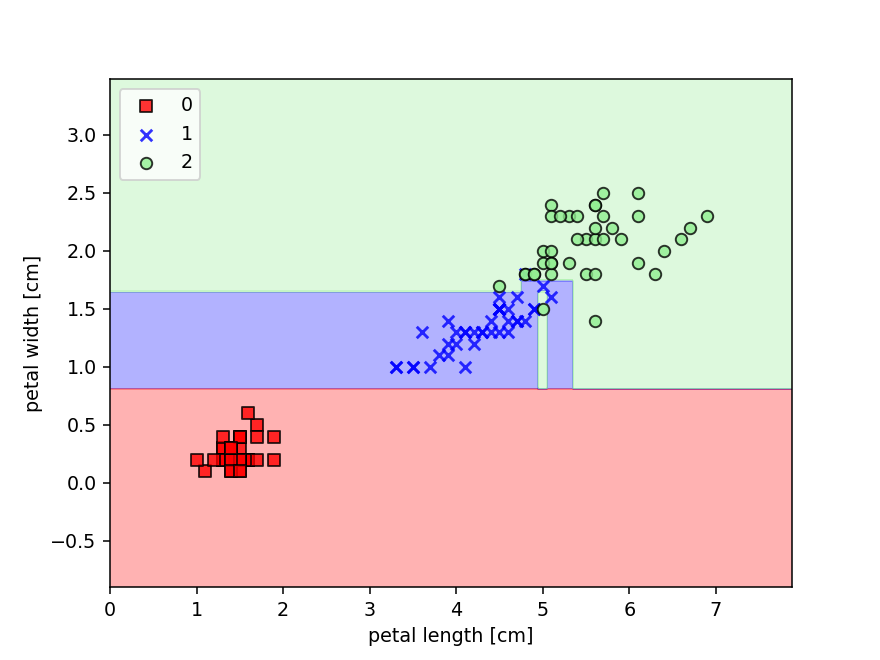

In [17]:
%matplotlib notebook
fig, ax = plt.subplots()
plot_decision_regions(X_train, y_train, tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

<IPython.core.display.Javascript object>


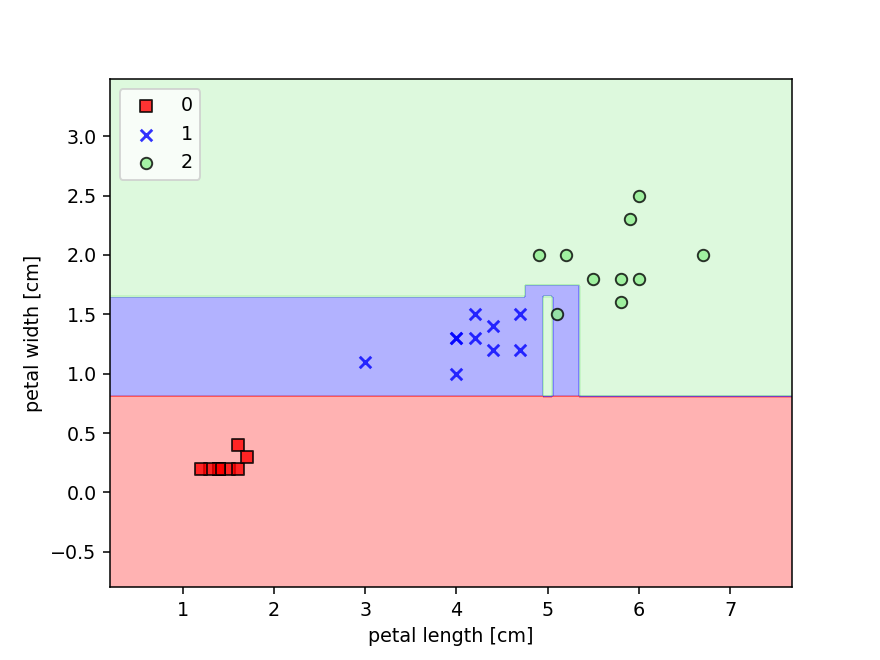

In [18]:
%matplotlib notebook
fig, ax = plt.subplots()
plot_decision_regions(X_test, y_test, tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

In [16]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal width'], out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

In [12]:
from sklearn.metrics import accuracy_score
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
print(f'Precision en el conjunto de entrenamiento: {accuracy_score(y_train, y_pred_train)}')
print(f'Precision en el conjunto de test: {accuracy_score(y_test, y_pred_test)}')

Precision en el conjunto de entrenamiento: 0.975
Precision en el conjunto de test: 0.9666666666666667


<span class="burk">EJERCICIO</span>
1. Utilice el archivo `Social_Network_Ads.csv` para clasificar sus clases por medio de un arbol de decision. Utilice las variables User Age, EstimatedSalary, Purchased. Grafique, mida la precision de los conjuntos de entrenamiento y test y saque sus conclusiones.
2. Utilice el archivo `usuarios_win_mac_lin` y clasifique sus clases por medio de arboles de decision. Grafique el diagrama de arbol, mida la precision de los conjuntos de entrenamiento y test y saque sus conclusiones.

3. Utilice la siguiente instruccion para cargar valores para X y y:
    
        datasets.make_classification(1000, 20, n_informative=3)
        
   Realice la parte de preprocesado, clasifique los datos y mida su precision.
   
   Mas informacion sobre esta instruccion en: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
